In [1]:
#written by Francis Osei Tutu Afrifa, 2022.

from warnings import filterwarnings

filterwarnings('ignore')

from distributed import Client
client = Client(n_workers = 4, threads_per_worker=1, memory_limit='2GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:55555,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:55589,Total threads: 1
Dashboard: http://127.0.0.1:55591/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:55561,


In [2]:
from scipy import io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
cwd = os.getcwd()
cwd

'C:\\Users\\Francis\\Desktop\\LAB\\PhysMet\\assignment\\python'

In [3]:
d_file = io.readsav('atsc5010_Lab1.idlsav')
lwc_pvm = d_file['lwc_pvm']; lwc_cdp = d_file['lwc_cdp']
n_fssp = d_file['n_fssp']; n_cdp = d_file['n_cdp']; wwind = d_file['wwind']

array_10hz = np.arange(-5,5.01,0.01)
array_25hz = np.arange(-5,5.004,0.004)

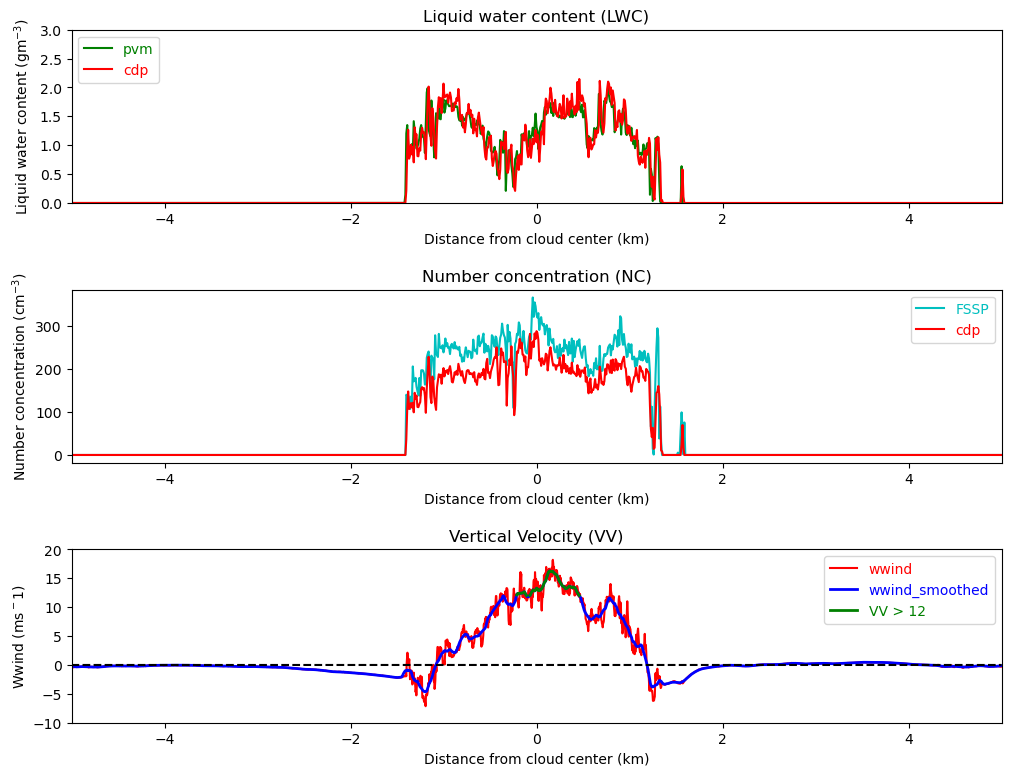

In [4]:
Fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,9)) ## 1200 pixels wide by 900 pixels high ##
plt.subplots_adjust(hspace=0.5)
ax = axes.flatten()

ax[0].plot(array_10hz, lwc_pvm, 'g', label='pvm')
ax[0].plot(array_10hz, lwc_cdp, 'r', label='cdp')
ax[0].set(ylim=(0,3), xlim=(-5,5), title='Liquid water content (LWC)', xlabel='Distance from cloud center (km)', ylabel='Liquid water content (gm$^{-3}$)' )
ax[0].legend(loc='upper left',labelcolor = 'linecolor')

ax[1].plot(array_10hz, n_fssp, 'c', label='FSSP')
ax[1].plot(array_10hz, n_cdp, 'r', label='cdp')
ax[1].set(xlim=(-5,5), title='Number concentration (NC)', xlabel='Distance from cloud center (km)', ylabel='Number concentration (cm$^{-3}$)')
ax[1].legend(loc='upper right',labelcolor = 'linecolor')

#smoothen data
wwind_smoothed = np.convolve(wwind, np.ones(25)/25, mode='same') ### Linear convolution idea (np.convolve) from Jeff Nivitanont, 2021.

### Make a copy of the smoothed data ###
smoothed_copy = wwind_smoothed.copy()

'''
To retain only values in excess of 12 m/s, 
let's replace values less than or equal to 12 m/s with nan (missing values):
'''
smoothed_copy_12 = np.where(smoothed_copy<=12, np.nan, smoothed_copy) #wwind_smoothed[np.where(wwind_smoothed<=12)[0]]= np.nan

ax[2].plot(array_25hz, wwind, 'r', label='wwind')
ax[2].plot(array_25hz, wwind_smoothed, 'b', label='wwind_smoothed',linewidth=2) 
ax[2].plot(array_25hz, smoothed_copy_12, 'g', linewidth=2, label='VV > 12')
ax[2].plot(array_25hz, np.zeros(2501), '--k')
ax[2].set(ylim=(-10,20), xlim=(-5,5), title='Vertical Velocity (VV)', xlabel='Distance from cloud center (km)', ylabel='Wwind (ms$^-1$)')
ax[2].legend(loc='upper right',labelcolor = 'linecolor')

#plt.savefig('afrifa_lab1b.jpg')
plt.show()

Liquid Water Content
--

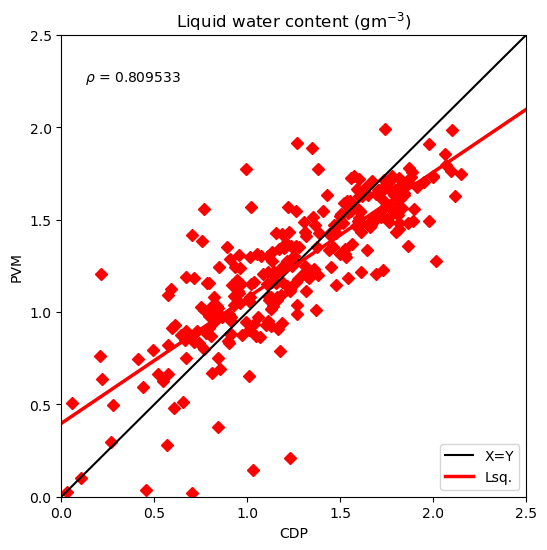

In [5]:
#indices = (np.where(lwc_cdp>.02) and np.where(lwc_pvm>.02))[0]
indices = np.logical_and(lwc_cdp>.02, lwc_pvm>.02)
#len(lwc_cdp[indices])

### compute line of best fit ###
lin_fit = np.polyfit(lwc_cdp[indices], lwc_pvm[indices], 1, full=True) ## from numpy.polyfit documentary ##
slope=lin_fit[0][0]
intercept=lin_fit[0][1]
x = np.array([0,2.5])
y = [slope*x + intercept] ## Idea from equation of a straight line y = mx + c

### Compute the correlation coefficient ###
corr = np.corrcoef(lwc_cdp[indices],lwc_pvm[indices])
corr_coeff = corr[0][1]

Fig = plt.figure(figsize=(6,6))
ax = Fig.add_subplot(111)
ax.plot(lwc_cdp[indices], lwc_pvm[indices], 'rD')
ax.plot(x,x.copy(), 'k', label='X=Y')
ax.plot(x,y[0], 'r', linewidth=2.5, label='Lsq.')
ax.text(.05, .9, r'$\rho$ =' f'{corr_coeff: 3f}', transform=ax.transAxes)
ax.set(xlim=x,ylim=x.copy(), xlabel='CDP', ylabel='PVM', title='Liquid water content (gm$^{-3}$)')
ax.legend(loc='lower right')
#plt.savefig('afrifa_lab1b_lwc_pvm-cdp.jpg')
plt.show()

Number Concentration
--

FSSP - Y AND CDP - X
--

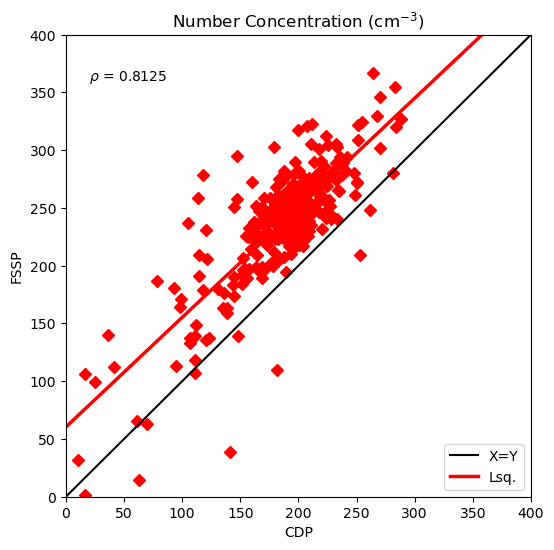

In [8]:
#indices = (np.where(n_fssp>1) and np.where(n_cdp>1))[0]
indices = np.logical_and(n_cdp>1, n_fssp>1)

### compute line of best fit ###
lin_fit = np.polyfit(n_cdp[indices], n_fssp[indices], 1, full=True) ## from numpy.polyfit documentary ##
slope=lin_fit[0][0]
intercept=lin_fit[0][1]
x = np.array([0,400])
y = [slope*x + intercept] ## Idea from equation of a straight line y = mx + c

### Compute the correlation coefficient ###
corr = np.corrcoef(n_cdp[indices], n_fssp[indices])
corr_coeff = corr[0][1]


Fig = plt.figure(figsize=(6,6))
ax = Fig.add_subplot(111)
ax.plot(n_cdp[indices], n_fssp[indices], 'rD')
ax.plot(x,x.copy(), 'k', label='X=Y')
ax.plot(x,y[0], 'r', linewidth=2.5, label='Lsq.')
ax.text(.05, .9, r'$\rho$ =' f'{corr_coeff: 3.4f}', transform=ax.transAxes)
ax.set(xlim=x,ylim=x, xlabel='CDP', ylabel='FSSP', title = 'Number Concentration (cm$^{-3}$)')
ax.legend(loc='lower right')
#plt.savefig('afrifa_lab1b_n_fssp-cdp.jpg')
plt.show()

FSSP - X AND CDP - Y
--

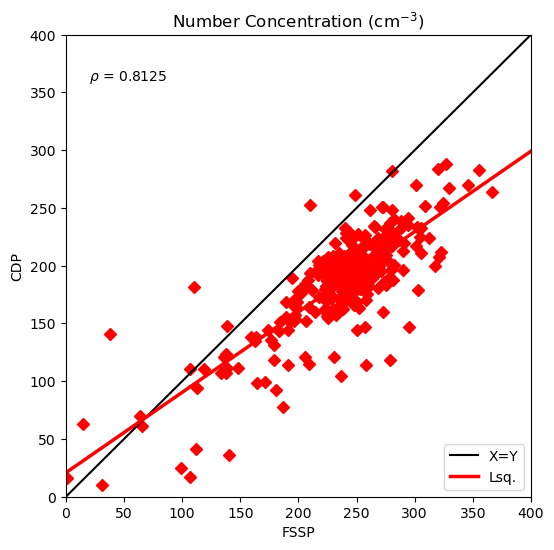

In [9]:
#indices = (np.where(n_fssp>1) and np.where(n_cdp>1))[0]
indices = np.logical_and(n_cdp>1, n_fssp>1)

### compute line of best fit ###
lin_fit = np.polyfit(n_fssp[indices],n_cdp[indices], 1, full=True) ## from numpy.polyfit documentary ##
slope=lin_fit[0][0]
intercept=lin_fit[0][1]
x = np.array([0,400])
y = [slope*x + intercept]  ## Idea from equation of a straight line y = mx + c

### Compute the correlation coefficient ###
corr = np.corrcoef(n_fssp[indices], n_cdp[indices])
corr_coeff = corr[0][1]


Fig = plt.figure(figsize=(6,6))
ax = Fig.add_subplot(111)
ax.plot(n_fssp[indices], n_cdp[indices], 'rD')
ax.plot(x,x.copy(), 'k', label='X=Y')
ax.plot(x,y[0], 'r', linewidth=2.5, label='Lsq.')
ax.text(.05, .9, r'$\rho$ =' f'{corr_coeff: 3.4f}', transform=ax.transAxes)
ax.set(xlim=x,ylim=x, ylabel='CDP', xlabel='FSSP', title = 'Number Concentration (cm$^{-3}$)')
ax.legend(loc='lower right')
#plt.savefig('afrifa_lab1b_n_cdp-fssp.jpg')
plt.show()